# Introduction to Structural Mechanics ME-104
__Studio 05) Equilibrium for Structures in 3D, Trusses__

Instructors: [Pedro Reis](mailto:Pedro.Reis@epfl.ch), [Till Junge](mailto:till.junge@epfl.ch)

## Learning goals:
- Solve systems of equations for multi-body structures

## Jupyter Problem 5.1

Determine the force acting on the $ABC$ bar at the support in $A$ of the space frame shown below (Both symbolically and numerically).

<div>
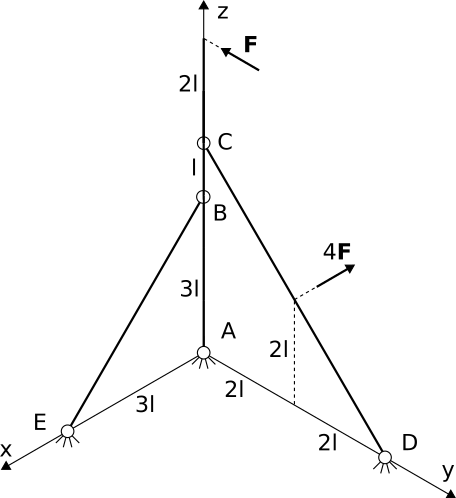
</div>

Numerical application: $l=1$ m, $F=1$ kN.

### Answers
$A=\sqrt{\frac{325}{18}}F=4.25 \text{ kN}$

$\boldsymbol{A} = \left[\begin{matrix}- \frac{2 F}{3}\\- \frac{F}{2}\\\frac{25 F}{6}\end{matrix}\right] = \left[\begin{array}{c}- 666.7 \mathrm{N}\\- 500.0 \mathrm{N}\\4167.0 \mathrm{N}\end{array}\right]$

## Jupyter Problem 5.2,  Adapted from Exam 2013
Four identical and perfectly smooth billiard balls, each with a mass $m$ and radius $r$, are placed in a square frame which rests on a horizontal surface, the height of which slightly exceeds the height of the center of the balls. The dimensions of the frame are such that the four balls do not touch each other.  Nevertheless, the distance between their surfaces is negligible. A fifth ball
is placed over the other four. Determine:

 1. the expression of the force exerted by the fifth ball on each of the four balls below (5 points);
 1. the expression of the two forces exerted by the frame on each of the four balls below (3 points);
 1. the expression of the force exerted by the horizontal surface on each of the four balls below (2 points).

Note: for the acceleration due to gravity, use the symbol $g$.

<div>
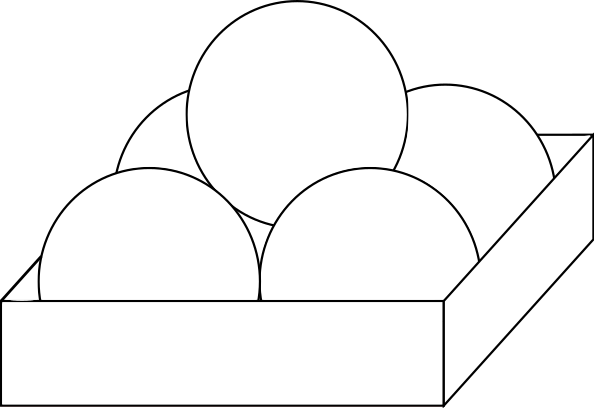
</div>

### Answers:
$ F_{1} = \frac{\sqrt{2} g m}{4}\quad F_{2} = \frac{\sqrt{2} g m}{8} \quad F_{3} = \frac{5 g m}{4} $

### Hint:
Use the following coordinate system to make your like easier:

<div>
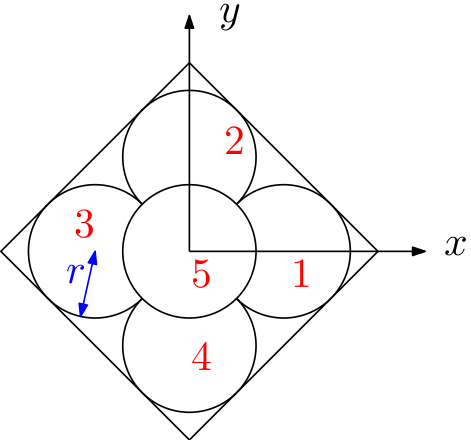
</div>

## Supplemental Material

These exercises are not mandatory _yet_. However, since they visualize internal loads in plane trusses, they can be very instructive and help understanding concepts such as zero-force members. Also, they produce pretty graphs.

_You are highly encouraged to play with these they will help you get a feeling for truss problems without having to solve any systems of equations_.

### Computing trusses

We have provided the simple truss calculator module `two_d_truss.py` you can use to visualize plane truss structures.

The following example shows how it can be used to visualize trusses (important to check your model), to build the linear system of equations and to visualize the result.

To use the module, we need to import it like you are used to do with modules like `numpy` and `sympy`

In [1]:
import numpy as np
from two_d_truss import plot_truss
%matplotlib inline

Geometrically, a truss is fully defined by the positions of its joints and a list of struts linking them. `plot_truss` expects both the joint positions and the struts to be defined as `numpy` arrays.

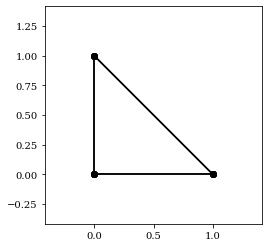

In [2]:
# definition of the joints: A simple matrix with the joint coordinates as rows:
joints = np.array([[0., 0.],  # joint 0
                   [1., 0.],  # joint 1
                   [0., 1.]]) # joint 2

# definition of struts: each strut links two joints:
struts = np.array([[0, 1], # strut from joint 0 to joint 1
                   [1, 2], # strut from joint 1 to joint 2
                   [2, 0]])# strut from joint 2 to joint 0

# this can already be visualized:
plot_truss(joints, struts);

You see a plot of the the three joints (circles) linked by joints (black solid lines. In order to define the truss fully, we need to further define the support reactions. For `plot_truss`, we do that with a list of tuples, each containing the joint index of the support, as well as the direction of reaction. Note that a pin support has two reactions:

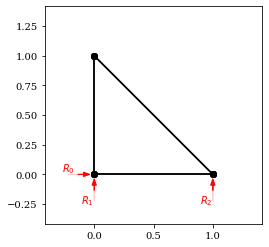

In [3]:
# but it's now very interesting yet, without reactions :
reactions = [(0, np.array((1., 0.))), # reaction force in x direction on joint 0
             (0, np.array((0., 1.))), # reaction force in y direction on joint 0
             (1, np.array((0., 1.)))] # reaction force in y direction on joint 1
plot_truss(joints, struts, reactions);

Now the truss is fully defined. In order to generate internal loads, we need to apply some external force. `plot_truss` takes external forces in the same format as reactions, as a list of joint index - force vector tuples.

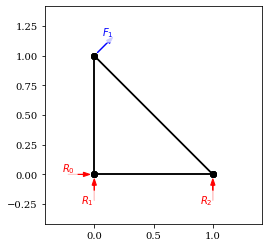

In [4]:
# and without external forces:
forces = [(2, np.array((1., 1.)))] # a force in (1,1) direction applied to joint 2
plot_truss(joints, struts, reactions, forces);

If we add the argument `with_solution=True`, `plot_truss` computes the solution of the problem and visualizes them.

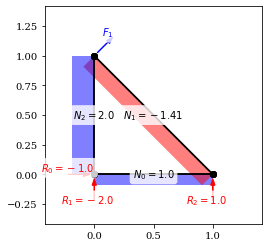

In [5]:
# the tool also lets you compute the internal reactions easily
plot_truss(joints, struts, reactions, forces, with_solution=True);

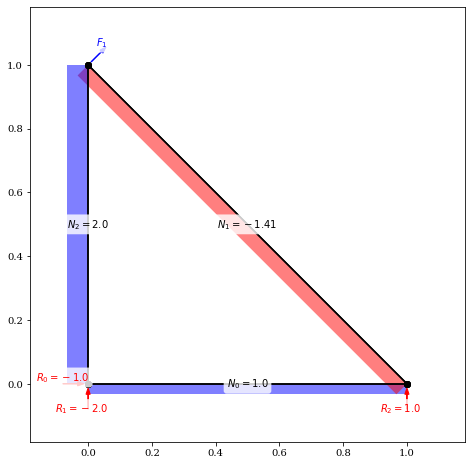

In [6]:
# you can also play with the size of the plot and the reactions by using the
# parameters `border` and `scale` (read the help on `plot_truss` for details).

plot_truss(joints, struts, reactions, forces,
           with_solution=True, scale=2, border=.06);

This can also be used for much more complicated trusses, e.g. the truss for Exercise 5.4:

<div>
    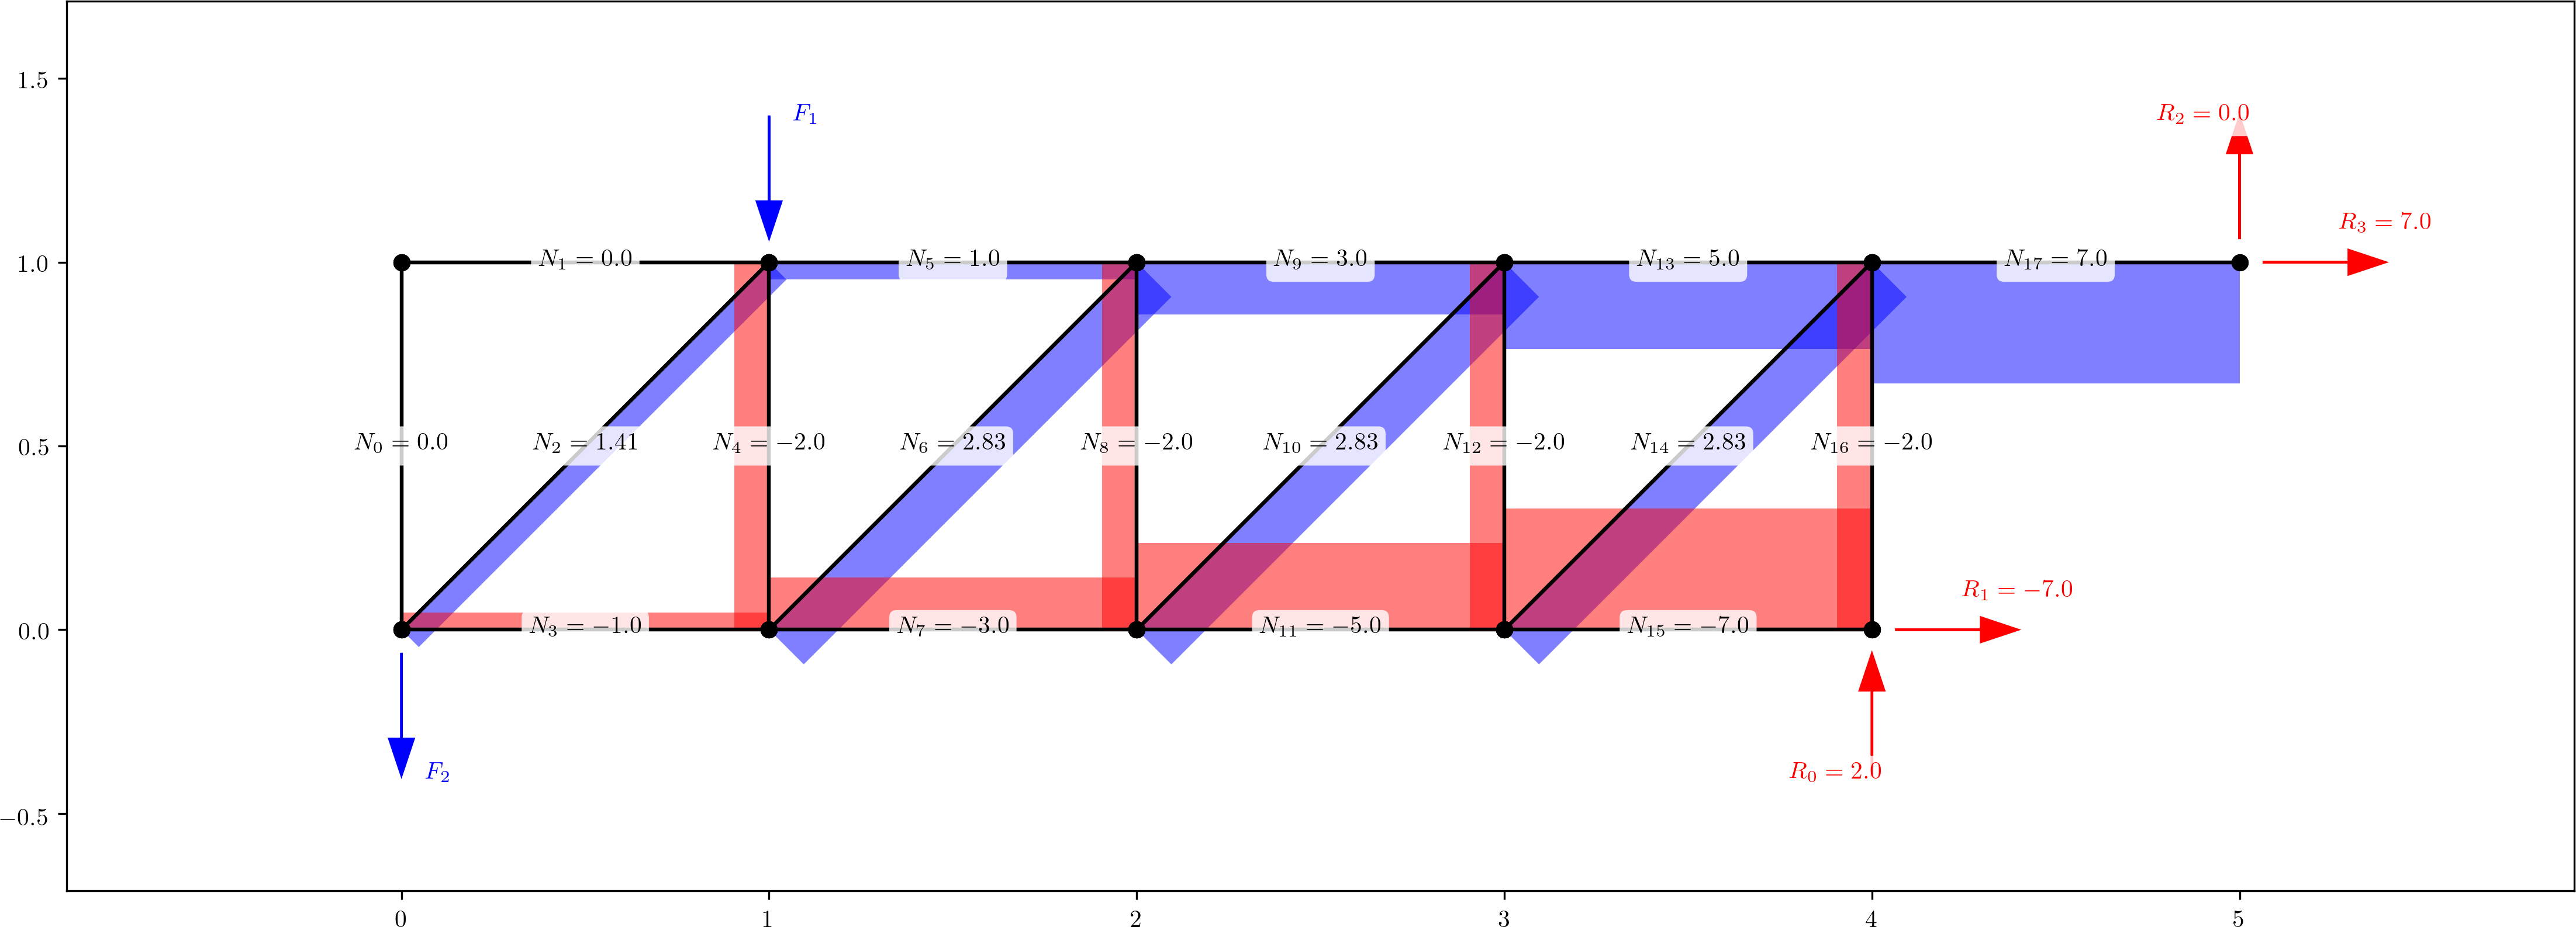
</div>

#### Tasks:
1. What happens if you exclude a strut in above example, why?
1. What happens in above example if you apply a reaction in $x$ direction to joint 1, instead of in $y$, why?
1. Use `plot_truss` to check your results on exercise 5.1. For numerical parameters, take $L= 100 \mathrm{kN}$ and $b = 2 \mathrm{m}$
1. For the model crane, compute the internal loads in all elements when a load of $P = 3\mathrm{N}$ is applied to the outermost point of the jib. Find which struts are not loaded and explain whether they could be removed (or, if not, explain the circumstances in which they would be loaded).

<div>
    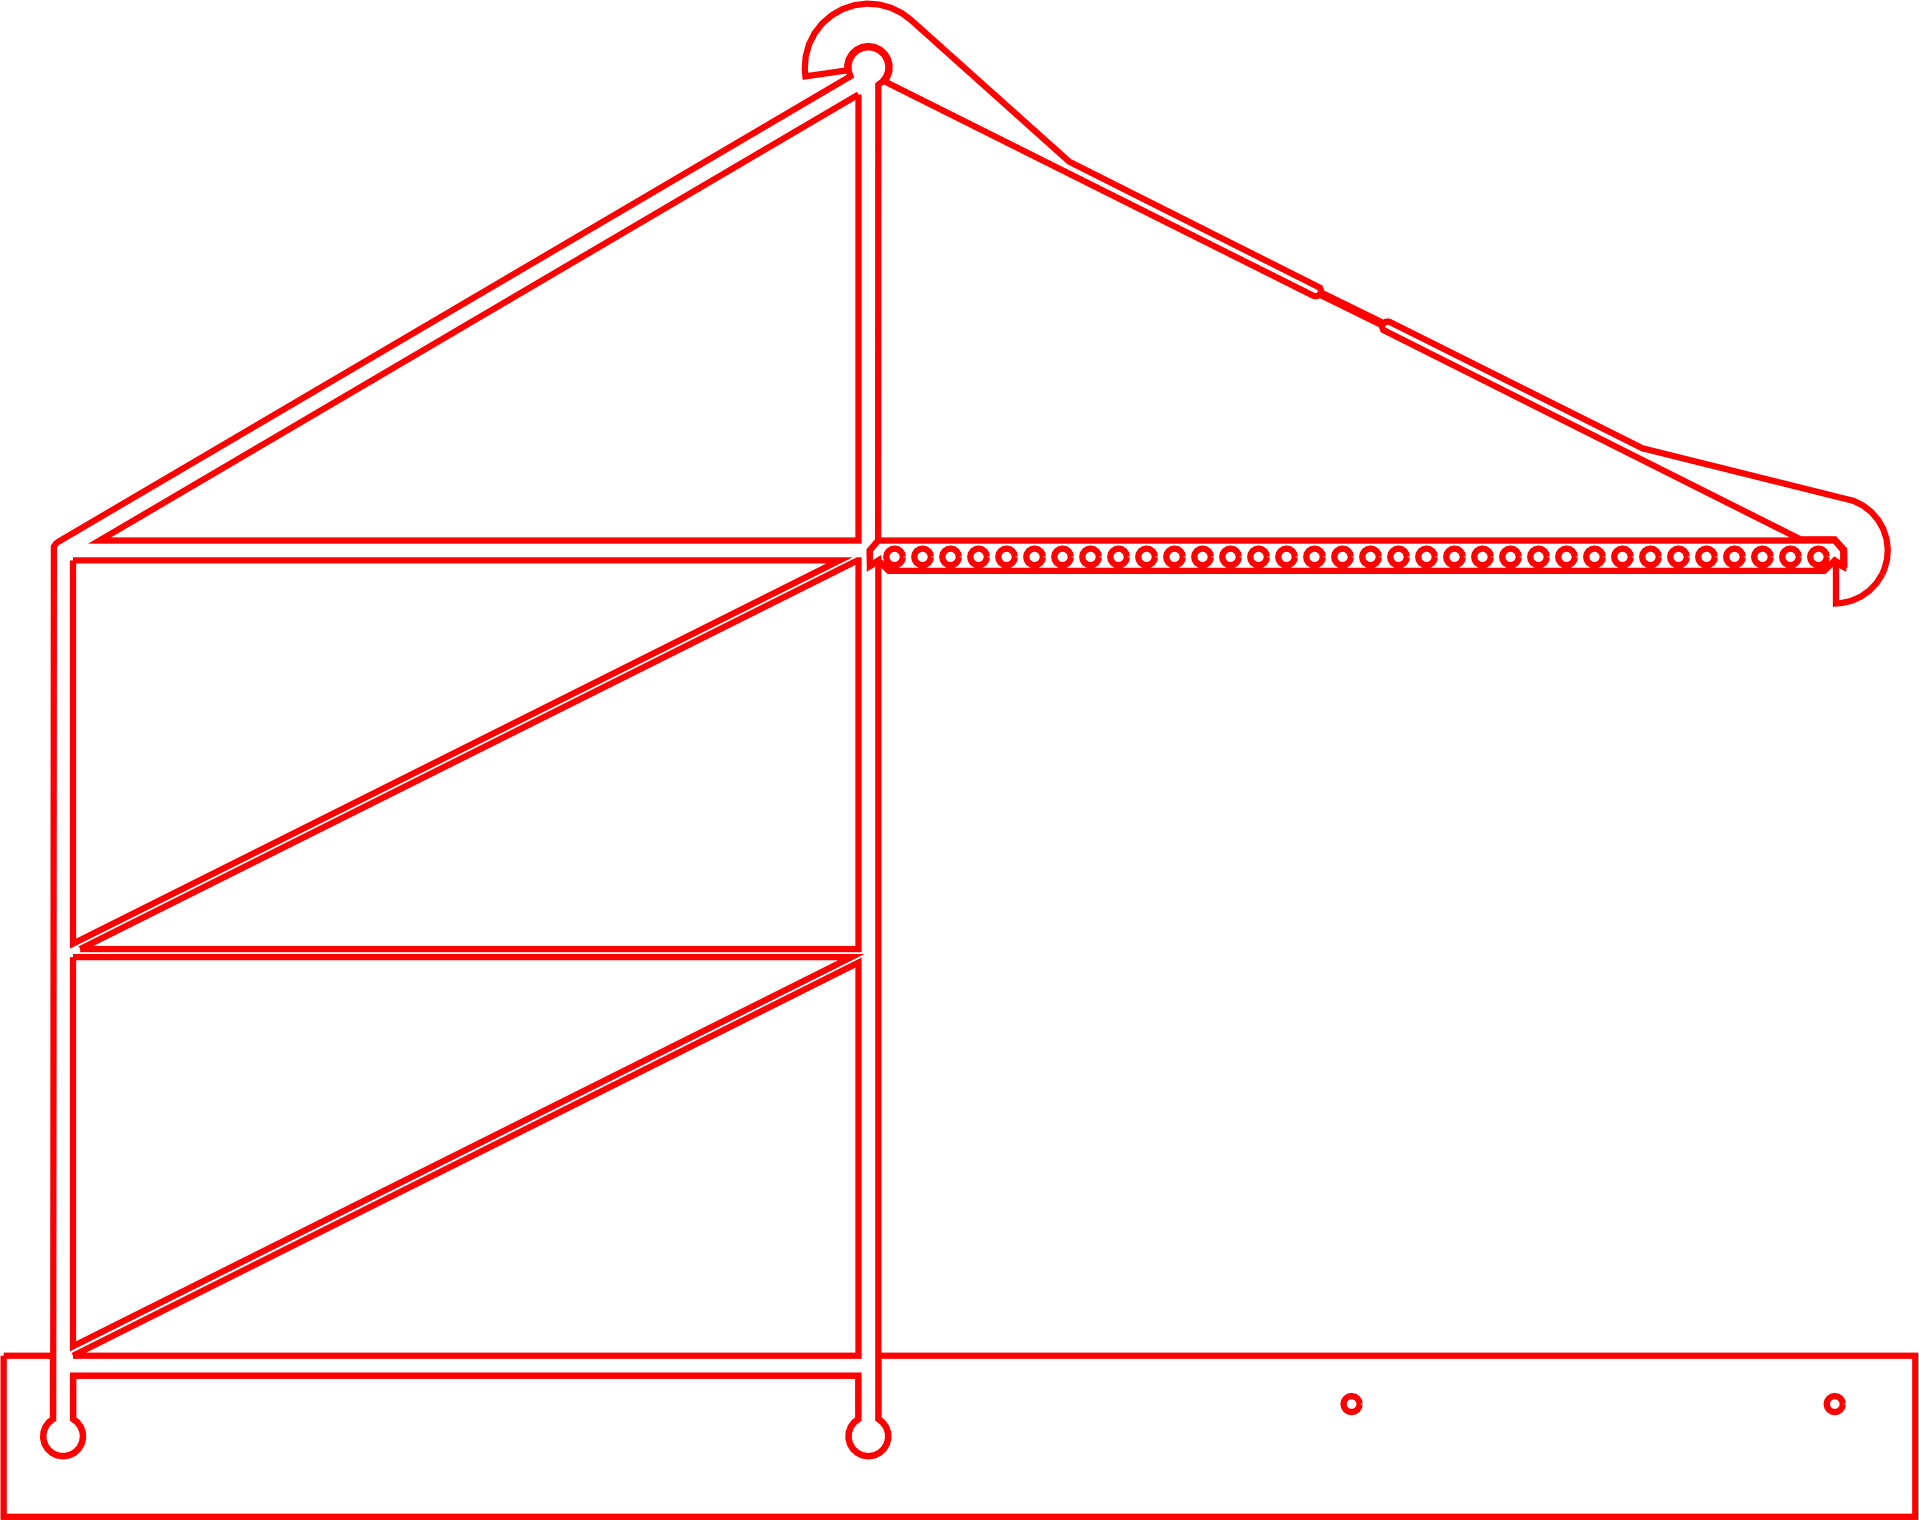
</div>